In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (8,6)

# Seeds Dataset

In [12]:
samples = pd.read_csv('datasets/seeds.csv',header=None)
samples

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Choosing nº of clusters

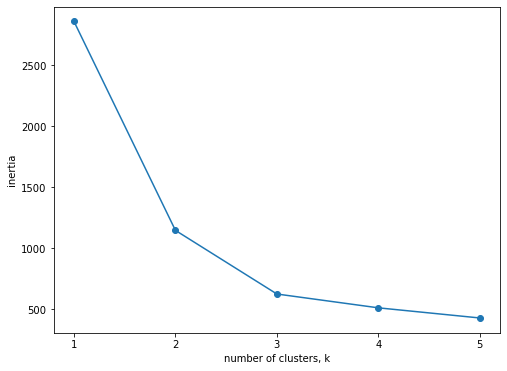

In [13]:
ks = range(1, 6)
inertias = []

#Calculate inertia for each k
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the clustering

In [19]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
varieties = samples[7].replace([1,2,3],["Canadian wheat","Kama wheat","Rosa wheat"])
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,1,60,0
1,5,0,70
2,64,10,0


# Fish Dataset
The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, features needs to be standarized first.

See more about feature scaling here: http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [29]:
fish = pd.read_csv('datasets/fish.csv',header=None)
fish

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [32]:
species = fish[0]
fish_samples = fish.drop(0,axis=1)
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(fish_samples)
fish_labels = pipeline.predict(fish_samples)
df = pd.DataFrame({'labels':fish_labels, 'species':species})
ct = pd.crosstab(df.labels, df.species)
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,17,0,0
2,0,0,0,13
3,1,0,19,1
